# **Gem Stones Images**

# **Step 1: Get dataset from Kaggle**

1. Download API Token berbentuk file .json terlebih dahulu
2. Upload ke direktori utama pada Google Colab
3. Install Kaggle

In [129]:
!pip install kaggle

4. buat folder baru dengan nama .kaggle

In [ ]:
! mkdir ~/.kaggle

5. Copy file kaggle.json ke dalam file yang telah dibuat sebelumnya

In [ ]:
! cp kaggle.json ~/.kaggle/

6. activate kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

7. Download dataset dari Kaggle dengan copy path dari website = https://www.kaggle.com/lsind18/gemstones-images

In [130]:
! kaggle datasets download -d joosthazelzet/lego-brick-images

 99% 0.98G/1.00G [00:09<00:00, 119MB/s]
100% 1.00G/1.00G [00:09<00:00, 116MB/s]


8. Unzip file yang telah terdownload sebelumnya

In [ ]:
! unzip lego-brick-images

# **Step 2: Preprocessing**

1. Define ukuran gambar yang diperlukan 
2. Define direktori folder yang berisi data train dan data test

In [139]:
IMAGE_SIZE = [224, 224]
train_image = '/content/train/'
test_image = '/content/test/'

AttributeError: ignored

3. Gunakan Image Data Generator untuk import gambar dari dataset
4. Lakukan preprocessing dengan mengatur gambar pada data training dan data test

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

5. Pastikan menyediakan target size yang sama seperti yang telah di define sebelumnya untuk image size

In [ ]:
training_set = train_datagen.flow_from_directory('/content/train/',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2856 images belonging to 87 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory('/content/test/',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 363 images belonging to 87 classes.


# **Step 3: Make and Train Model**

1. Import modul dan library yang dibutuhkan

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2. Untuk architecture model training menggunakan model InceptionV3 yang modelnya terdiri dari Convolutional Filter, Average Pooling Layer, Max Pooling Layer, Concatenation Layer, Dropout Layer (sumber : *Research Gate*)


  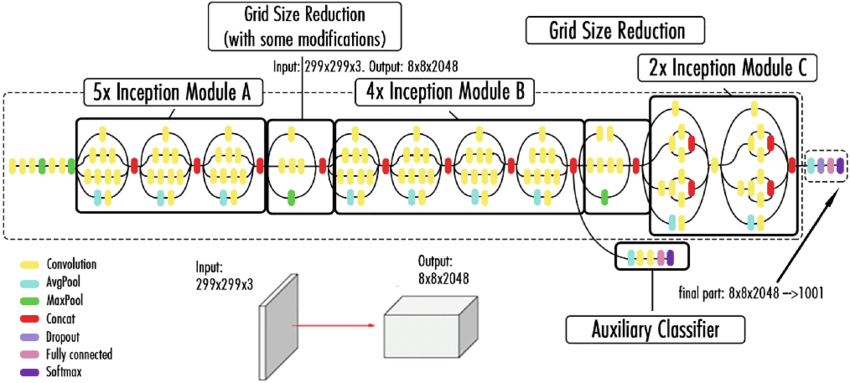

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

3. weights yang telah ada jangan di train kembali

In [ ]:
for layer in inception.layers:
  layer.trainable = False 

4. Dapatkan jumlah output class

In [ ]:
folders = glob('/content/train/*')
folders

5. Pada akhir model tambahkan Flatten layer dan prediction yang menggunakan aktivasi softmax

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

6. Buat model dengan menggunakan architecture Inceptionv3 sebelumnya dan tampilkan summary

In [ ]:
cnn_model = Model(inputs=inception.input, outputs=prediction)
cnn_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

7. Compile training model dengan menggunakan optimizer Adam dan loss categorical crossentropy

In [ ]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )

8. Latih model yang telah dibuat dengan data train. Untuk data validation menggunakan testing set

In [ ]:
training = cnn_model.fit_generator(
    training_set,
    validation_data = testing_set,
    epochs = 25,
    steps_per_epoch = len(training_set),
    validation_steps = len(testing_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
179/179 [==============================] - 55s 279ms/step - loss: 1.2797 - accuracy: 0.9604 - val_loss: 50.0679 - val_accuracy: 0.4545
Epoch 2/25
179/179 [==============================] - 48s 268ms/step - loss: 1.8840 - accuracy: 0.9461 - val_loss: 54.5776 - val_accuracy: 0.4325
Epoch 3/25
179/179 [==============================] - 47s 265ms/step - loss: 2.0121 - accuracy: 0.9510 - val_loss: 45.9279 - val_accuracy: 0.5014
Epoch 4/25
179/179 [==============================] - 47s 263ms/step - loss: 1.3564 - accuracy: 0.9573 - val_loss: 48.7257 - val_accuracy: 0.4876
Epoch 5/25
179/179 [==============================] - 47s 263ms/step - loss: 1.5284 - accuracy: 0.9527 - val_loss: 51.8556 - val_accuracy: 0.4628
Epoch 6/25
179/179 [==============================] - 47s 262ms/step - loss: 1.5596 - accuracy: 0.9555 - val_loss: 46.1928 - val_accuracy: 0.5234
Epoch 7/25
179/179 [==============================] - 47s 261ms/step - loss: 1.2477 - accuracy: 0.9622 - val_loss: 49.5854 -

9. Plot loss dan accuracy dari hasil latih

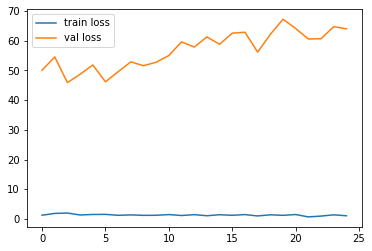

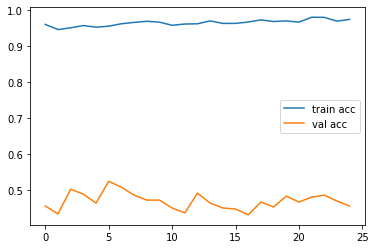

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot loss
plt.plot(training.history['loss'], label='train loss')
plt.plot(training.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot accuracy
plt.plot(training.history['accuracy'], label='train acc')
plt.plot(training.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

10. Evaluate hasil latih sebelumnya dan tampilkan accuracy keseluruhannya

In [ ]:
eval_result = cnn_model.evaluate(testing_set)
print("Accuracy : {:.3f}".format(eval_result[1]))

23/23 [==============================] - 3s 106ms/step - loss: 64.0314 - accuracy: 0.4545
Accuracy : 0.455


In [ ]:
from tensorflow.keras.models import load_model

cnn_model.save('model_inception.h5')

# **Step 4: Testing**

1. Prediksi data test dengan menggunakan model yang telah dilatih
